# Part II - Explanatory Analysis of Prosper Loan Data

## by Prince G Sibanda

## Investigation Overview
> The project is aimed at figuring out the factors that influence the loan status (defaulting of loans and loan approval) 

## Dataset Overview
> The prosper loans dataset contains 113,937 rows and 81 columns of data. However the dataset was scaled down to a manageable number of variables wchich contains 83801 listings and 18 features as listed below:
ListingCategory        
BorrowerState          
Occupation             
EmploymentStatus       
StatedMonthlyIncome    
IncomeVerifiable       
IsBorrowerHomeowner    
BorrowerAPR            
BorrowerRate           
Recommendations        
Term                   
                                                                     ... continues in the next slide

> LoanOriginalAmount     
MonthlyLoanPayment     
TotalProsperLoans      
ProsperRating_Alpha    
ProsperScore           
LoanStatus             
Year                   
Month  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('master_clean_archive.csv')

In [3]:
Status_Order = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 
        'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)','Cancelled', 
        'Chargedoff', 'Defaulted']
Prosper_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
Score_Order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Employment_order =['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Other','Retired', 'Not employed']

## Yearly distribution of loans

The number of listings has been increasing since July 2009 to 2013 where 2013 recorded the highest number of loan listings. A sharp decline was experienced in 2014 and no information is available to explain this fall.

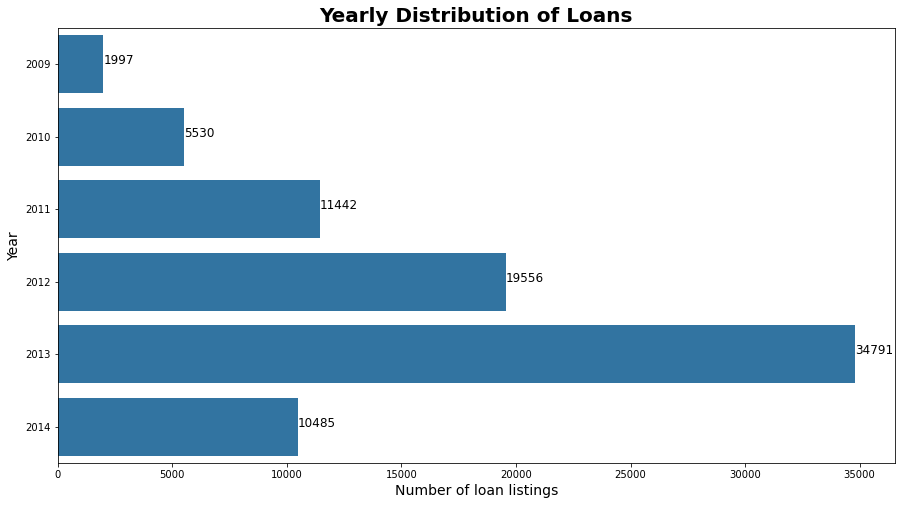

In [4]:
fig, ax = plt.subplots(nrows=1, figsize = [15,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df_clean, y = 'Year', color = default_color, ax = ax)
plt.title('Yearly Distribution of Loans', fontsize = 20, weight = 'bold')
plt.xlabel('Number of loan listings', fontsize = 14)
plt.ylabel('Year', fontsize = 14);
    
locs, labels = plt.yticks()

for loc, label in zip(locs, labels):
        yearcount = df_clean.Year.value_counts()[int(label.get_text())]
        pct_str = '{}'.format(yearcount)
        plt.text(y=loc, x=yearcount, s=pct_str, va='baseline', rotation=360, fontsize='large')

## Distribution of Loan Terms
The Term with the highest number of loan listings is 36 months followed by 60 months and lastly 12 months. 

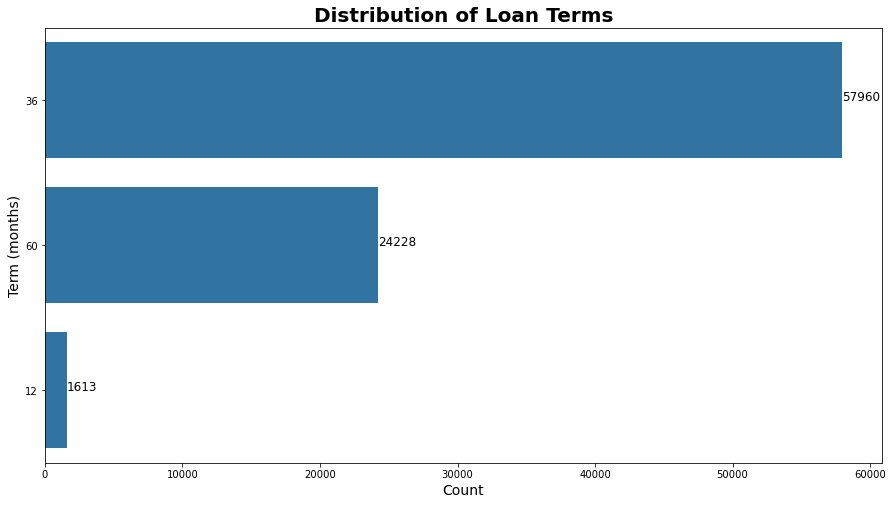

In [5]:
fig, ax = plt.subplots(nrows=1, figsize = [15,8])
default_color = sns.color_palette()[0]
sns.countplot(data = df_clean, y = 'Term', color = default_color, ax = ax, order = df_clean.Term.value_counts().index)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Term (months)', fontsize = 14)
plt.title('Distribution of Loan Terms', fontsize = 20, weight = 'bold');

locs, labels = plt.yticks()

for loc, label in zip(locs, labels):
        termcount = df_clean.Term.value_counts()[int(label.get_text())]
        pct_str = '{}'.format(termcount)
        plt.text(y=loc, x=termcount, s=pct_str, va='baseline', rotation=360, fontsize='large')

## Relationship between employment status and term
36 months is the highest recorded term followed by 60 months. Most employed and and full time borrowers took the 36 month term to settle the loan.

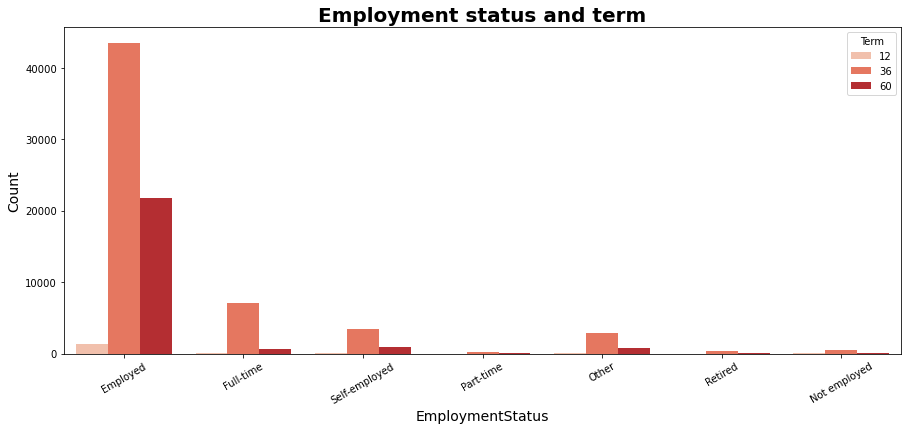

In [6]:
plt.figure(figsize = [15, 6])
sns.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'Term', palette = 'Reds', order = Employment_order)
plt.xticks(rotation = 30)
plt.xlabel('EmploymentStatus', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Employment status and term', weight = 'bold', fontsize = 20);

## Average Monthly income by Occupation

Top 5 earning occupations on a monthly basis are : doctor, attorney, executive, judge and dentist

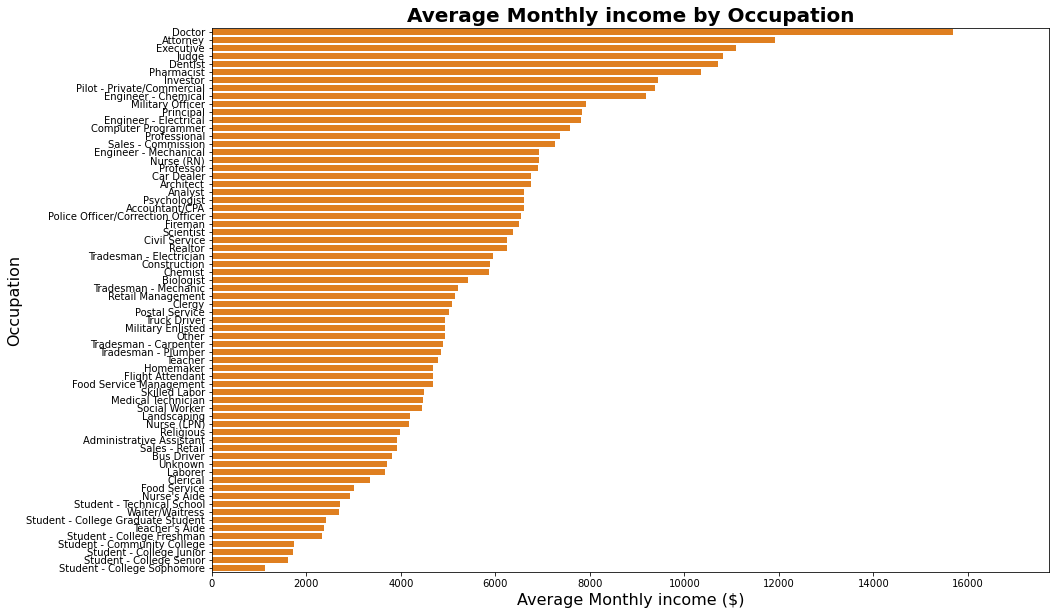

In [7]:
Occupation = df_clean.groupby('Occupation')['StatedMonthlyIncome'].mean()
Occupation = Occupation.sort_values(ascending = False).index
plt.figure(figsize = [15, 10])
base_color = sns.color_palette("Paired")[7]
sns.barplot(data = df_clean, y = 'Occupation', x = 'StatedMonthlyIncome', color = base_color, errwidth = 0,
           order= Occupation)
plt.ylabel("Occupation", fontsize = 16)
plt.xlabel('Average Monthly income ($)', fontsize = 16)
plt.title("Average Monthly income by Occupation", fontsize = 20, weight = 'bold')
plt.xticks(rotation = 0);

## How does ProsperRating_Alpha relate to BorrowerRate on termly basis?
Borrowers with the relatively high prosper ratings (high eligible for approval of loans)enjoy the benefit of lower interest however interest rate increases slightly with increase in terms from 12 month to 36 months to 60 months

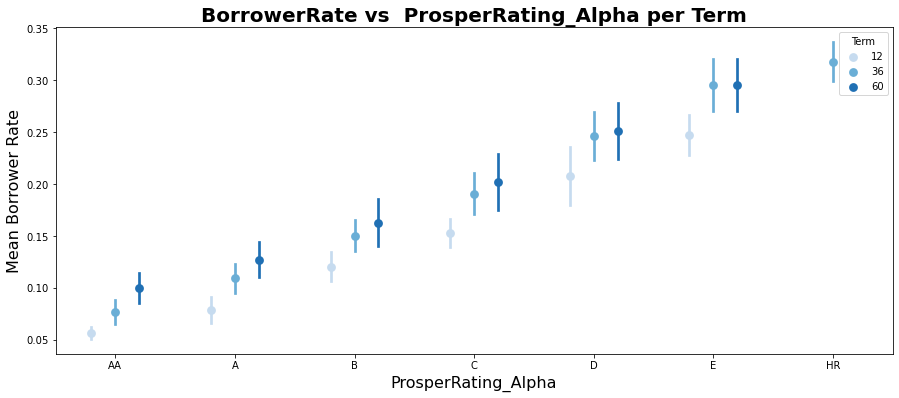

In [8]:
fig = plt.figure(figsize = [15,6])
ax = sns.pointplot(data = df_clean, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', order = Prosper_order)
plt.title('BorrowerRate vs  ProsperRating_Alpha per Term', fontsize = 20, weight = 'bold')
plt.ylabel('Mean Borrower Rate', fontsize =16)
plt.xlabel('ProsperRating_Alpha', fontsize=16)
ax.set_yticklabels([],minor = True);

## How does LoanStatus relate to BorrowerRate on termly basis?
Current loans have lower interest rates as opposed to the defaulted ones ranging above 0.2 to 0.25.

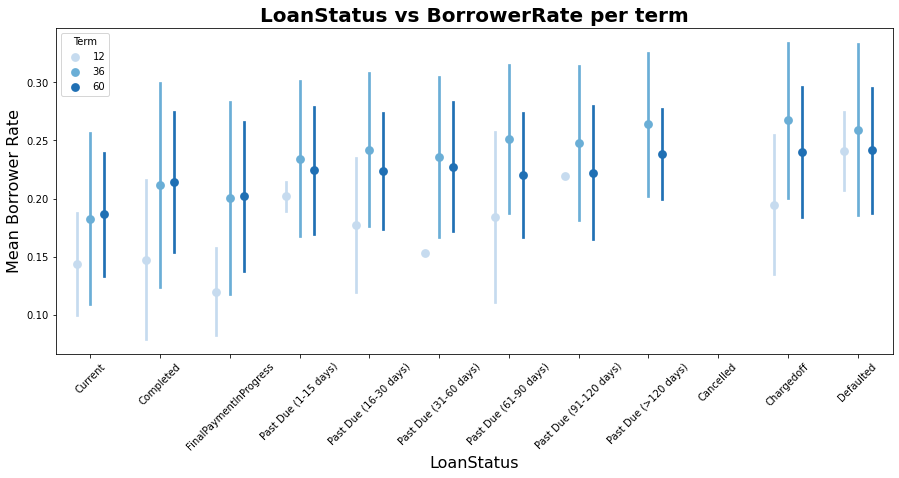

In [9]:
fig = plt.figure(figsize = [15,6])
ax = sns.pointplot(data = df_clean, x = 'LoanStatus', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', order = Status_Order)
plt.title('LoanStatus vs BorrowerRate per term', weight = 'bold', fontsize = 20)
plt.ylabel('Mean Borrower Rate', fontsize = 16)
plt.xlabel('LoanStatus', fontsize = 16)
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 45);

## Borrower rate vs EmploymentStatus vs Term

The employed and full time borrowers have relatively lower interest rates which increase fairly with change in terms with 12 month term having the lowest and 36 months having the highest rate. it is important to not that on a 60 month term, the retired borrowers have the lowest rate amongst other groups in that category.

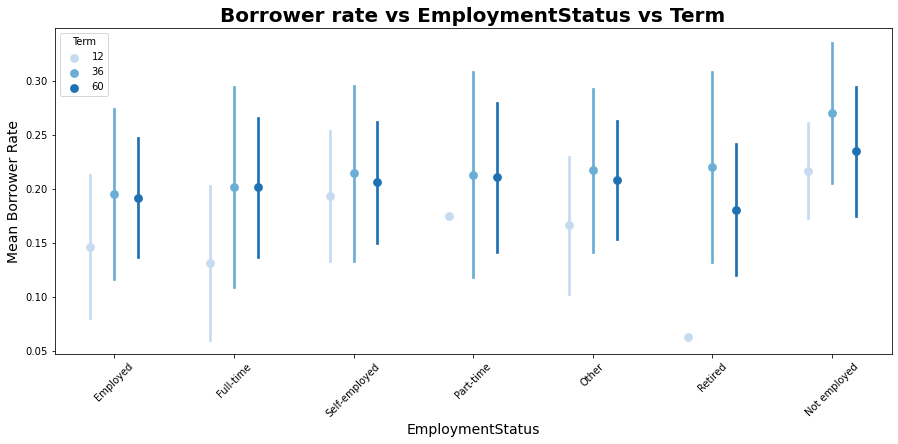

In [10]:
fig = plt.figure(figsize = [15,6])
ax = sns.pointplot(data = df_clean, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd', order = Employment_order)
plt.title('Borrower rate vs EmploymentStatus vs Term', weight = 'bold', fontsize = 20)
plt.ylabel('Mean Borrower Rate', fontsize = 14)
plt.xlabel('EmploymentStatus', fontsize = 14)
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 45);

## BorrowerAPR vs BorrowerRate per ProsperRating_Alpha
The higher the ProsperRatings the lower the Borrower ratings making borrowers with such ratings unlikely to default on their loan repayment.

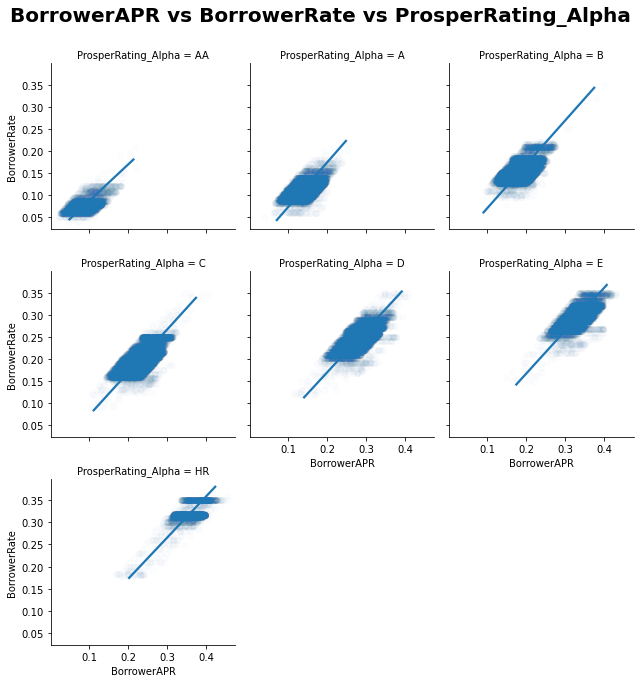

In [11]:
g = sns.FacetGrid(data = df_clean, col= 'ProsperRating_Alpha', height = 3, margin_titles = True, col_wrap=3, col_order = Prosper_order)
g.map(sns.regplot, 'BorrowerAPR', 'BorrowerRate', scatter_kws={'alpha': 0.01}, x_jitter=0.04)
plt.suptitle('BorrowerAPR vs BorrowerRate vs ProsperRating_Alpha', y=(1.05), weight ='bold', fontsize =20)
plt.show();

## EmploymentStatus vs ProsperRating_Alpha vs Loanstatus

From the below visualizations it is observed that the full employed borrowers have good prosper ratings ranging from AA to C, thus making them eligible for loan approvals with lower interest rate to be incurred (see visualization 4). Prosper rating D is the most frequent rating among defaulted credits. Prosper rating C is the most frequent rating among current credits for the employed dataset.The employed borrowers with C-rating have the highest count in overall.

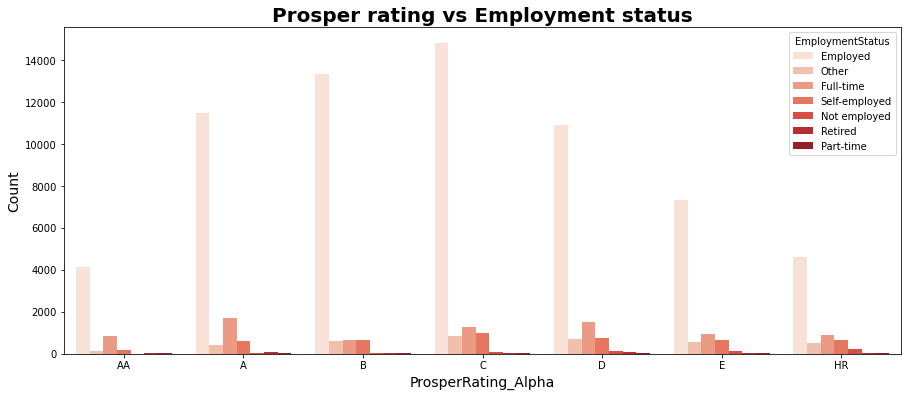

In [12]:
plt.figure(figsize = (15,6))
sns.countplot(data = df_clean, hue = 'EmploymentStatus', x = 'ProsperRating_Alpha', palette = 'Reds', order=Prosper_order);
plt.title('Prosper rating vs Employment status', fontsize = 20, weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('ProsperRating_Alpha', fontsize = 14)
plt.show();

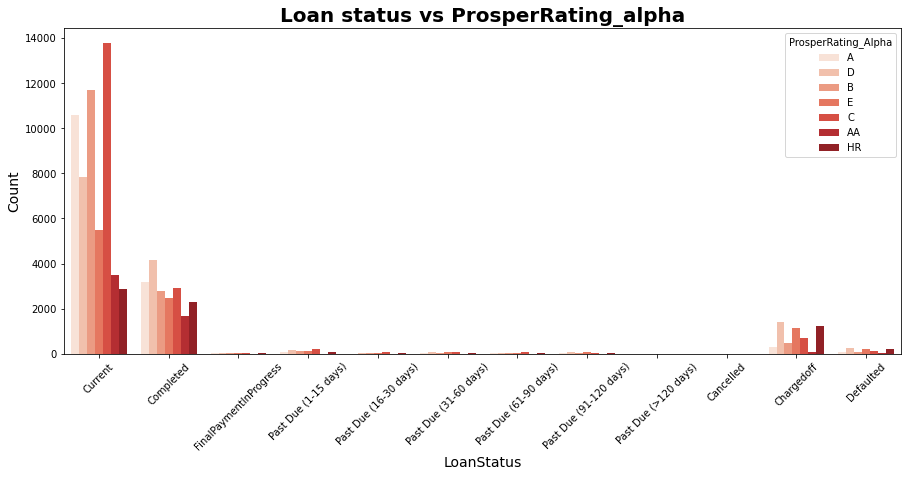

In [13]:
plt.figure(figsize = (15,6))
sns.countplot(data = df_clean, x = 'LoanStatus', hue = 'ProsperRating_Alpha', palette = 'Reds', order=Status_Order)
plt.xticks(rotation = 45)
plt.title('Loan status vs ProsperRating_alpha', fontsize = 20, weight = 'bold')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('LoanStatus', fontsize = 14)
plt.show();

In [14]:
!jupyter nbconvert Part_II_slide_deck_Communicate_Data_Findings.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Communicate_Data_Findings.ipynb to slides
[NbConvertApp] Writing 1039830 bytes to Part_II_slide_deck_Communicate_Data_Findings.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\pgsib\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\pgsib\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\pgsib\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\pgsib\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\pgsib\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    sel